Autor: Gustavo Vilela Mitraud <br>
Universidade Presbiteriana Mackenzie

In [61]:
import pandas as pd
from matplotlib import pyplot as plt

df_steam = pd.read_csv("archive\steam.csv")
df_steam

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


Será dado um ID para cada valor em string em cada categoria. <br>
Por exemplo, Valve será igual a 1, Gearbox Software será igual a 2 e assim por diante

In [62]:
def create_ids(lst):
    lst_set = set()
    lst_ids = dict()

    for name in lst:
        if name not in lst_set:
            lst_set.add(name)
    
    for i, name in enumerate(lst_set):
        lst_ids[i] = name

    return lst_ids

dev_lookup = create_ids(df_steam["developer"])
publisher_lookup = create_ids(df_steam["publisher"])


Usando o IF-IDF para achar a similaridade entre os valores das categories "platforms" e "steamspy_tags e "genres"

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tf_idf_vectorizer = TfidfVectorizer()
def similarity(text_lst):
    tf_idf_transform = tf_idf_vectorizer.fit_transform(text_lst)
    return cosine_similarity(tf_idf_transform)

cos_sim_platforms = similarity(df_steam["platforms"])
cos_sim_tags = similarity(df_steam["steamspy_tags"])
cos_sim_genres = similarity(df_steam["genres"])
    
    

Criando o dataframe que sera usado para a recomendação

In [74]:
def transform_to_id(dict_of_ids, lst):
    list_of_ids = []
    keys = list(dict_of_ids.keys())
    values = list(dict_of_ids.values())
    for name in lst:
        list_of_ids.append(keys[values.index(name)])
    
    return list_of_ids

dev_ids = transform_to_id(dev_lookup, df_steam["developer"])
publisher_ids = transform_to_id(publisher_lookup, df_steam["publisher"])

popularity = [x.split("-")[1] for x in df_steam["owners"]]
positive_ratio = [pos-neg for pos,neg in zip(df_steam["positive_ratings"], df_steam["negative_ratings"])]
data_dict = {"dev_ids": dev_ids, "publisher_ids": publisher_ids, "tags_sim": list(cos_sim_tags[0]), "genres_sim": cos_sim_genres[0], "popularity": popularity, "positive_ratio": positive_ratio}

data_df = pd.DataFrame(data_dict)
data_df

,dev_ids,publisher_ids,tags_sim,genres_sim,popularity,positive_ratio
0,12492,10471,1.000000,1.000000,20000000,121195
1,12492,10471,1.000000,1.000000,10000000,2685
2,12492,10471,0.537860,1.000000,10000000,3018
3,12492,10471,1.000000,1.000000,10000000,1006
4,15439,10471,0.420275,1.000000,10000000,4962
...,...,...,...,...,...,...
27070,6621,5551,0.000000,0.000000,20000,3
27071,5805,12925,0.161619,0.605082,20000,7
27072,16315,13699,0.163285,0.607424,20000,-1
27073,9796,12347,0.000000,0.000000,20000,2


normalizando a base de dados

In [75]:
from sklearn.preprocessing import normalize
import numpy as np

data_df = normalize(data_df, axis=0)
data_df = pd.DataFrame(data_df)
data_df


,0,1,2,3,4,5
0,0.007674,0.007683,0.049473,0.015722,0.067653,4.608693e-02
1,0.007674,0.007683,0.049473,0.015722,0.033826,1.021027e-03
2,0.007674,0.007683,0.026610,0.015722,0.033826,1.147658e-03
3,0.007674,0.007683,0.049473,0.015722,0.033826,3.825525e-04
4,0.009485,0.007683,0.020792,0.015722,0.033826,1.886904e-03
...,...,...,...,...,...,...
27070,0.004068,0.004073,0.000000,0.000000,0.000068,1.140813e-06
27071,0.003566,0.009484,0.007996,0.009513,0.000068,2.661896e-06
27072,0.010023,0.010051,0.008078,0.009550,0.000068,-3.802709e-07
27073,0.006018,0.009059,0.000000,0.000000,0.000068,7.605418e-07


Aplicando um peso de 60% na categoria tags

In [78]:
data_df[2] = data_df[2].apply(lambda x: x*1.6)
data_df

,0,1,2,3,4,5
0,0.007674,0.007683,0.126651,0.015722,0.067653,4.608693e-02
1,0.007674,0.007683,0.126651,0.015722,0.033826,1.021027e-03
2,0.007674,0.007683,0.068120,0.015722,0.033826,1.147658e-03
3,0.007674,0.007683,0.126651,0.015722,0.033826,3.825525e-04
4,0.009485,0.007683,0.053228,0.015722,0.033826,1.886904e-03
...,...,...,...,...,...,...
27070,0.004068,0.004073,0.000000,0.000000,0.000068,1.140813e-06
27071,0.003566,0.009484,0.020469,0.009513,0.000068,2.661896e-06
27072,0.010023,0.010051,0.020680,0.009550,0.000068,-3.802709e-07
27073,0.006018,0.009059,0.000000,0.000000,0.000068,7.605418e-07


Para inicializar os centroids do K-means, será usado um jogo como exemplo para cada categoria

In [79]:
# ação: counterstrike global ofensive. APP ID: 730
# role-playing: final fantasy xiv online. APP ID: 39210
# estrategia: sid meier's civilization V. APP ID: 3990
# aventura: grand theft auto V.APP ID: 271590
# simulação: euro truck simulator 2. APP ID: 227300
# esportes: NBA 2K17: APP ID: 385760

def get_index(id):
    return df_steam.index[df_steam["appid"]==id][0]

example_ids = [730, 39210, 3990, 271590, 227300, 385760]
example_indexes = []

for id in example_ids:
    example_indexes.append(get_index(id))

example_indexes

[25, 744, 120, 2478, 1596, 6214]

In [80]:
example_df = data_df.iloc[example_indexes]
example_df

,0,1,2,3,4,5
25,0.010294,0.007683,0.093078,0.004230,0.338264,0.852602
744,0.007548,0.007541,0.032501,0.000000,0.006765,0.002928
120,0.004401,0.009544,0.000000,0.000000,0.006765,0.000038
2478,0.004334,0.006233,0.046146,0.010608,0.067653,0.072158
1596,0.005566,0.005577,0.000000,0.000000,0.033826,0.065005
6214,0.004829,0.009544,0.032296,0.000000,0.003383,0.000175


Aplicado o algoritmo K-means no dataframe

In [81]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(2)

reshaped_data = pca.fit_transform(data_df)
reshaped_example = pca.fit_transform(example_df)
print(reshaped_data.shape, reshaped_example.shape)


(27075, 2) (6, 2)


In [82]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 6, init=reshaped_example, n_init='auto')
clusters = k_means.fit_predict(reshaped_data)
clusters

c:\Users\gus_v\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:878: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.init == "k-means++":
c:\Users\gus_v\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


array([4, 5, 5, ..., 3, 3, 3])

<function matplotlib.pyplot.show(close=None, block=None)>

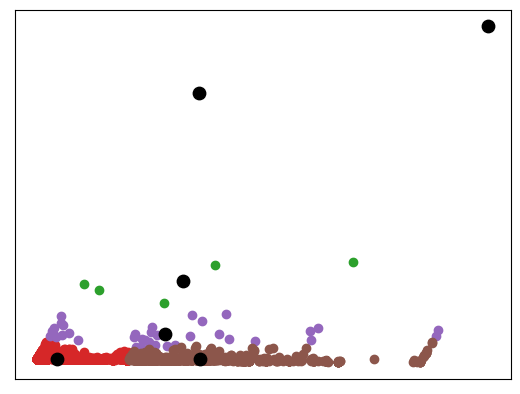

In [83]:
centroids = k_means.cluster_centers_
unique_clusters = np.unique(clusters)
for i in unique_clusters:
    plt.scatter(reshaped_data[clusters == i, 0], reshaped_data[clusters == i, 1], label = i)
plt.scatter(centroids[:,0], centroids[:,1], s = 80, color = "k")
plt.yticks(())
plt.xticks(())
plt.show

Agora vamos testar o modelo

In [84]:
lookup_recomendation = {"game_name": [x.lower() for x in df_steam["name"]], "cluster": clusters}
lookup_recomendation = pd.DataFrame(lookup_recomendation)
lookup_recomendation

,game_name,cluster
0,counter-strike,4
1,team fortress classic,5
2,day of defeat,5
3,deathmatch classic,5
4,half-life: opposing force,5
...,...,...
27070,room of pandora,3
27071,cyber gun,3
27072,super star blast,3
27073,new yankee 7: deer hunters,3


In [91]:
import random

def get_recomendation(game):
    cluster_to_recomend = int(lookup_recomendation.loc[lookup_recomendation["game_name"]==game]["cluster"])
    list_of_games = list(lookup_recomendation.loc[lookup_recomendation["cluster"]==cluster_to_recomend]["game_name"])
    return random.sample(list_of_games, 4)

get_recomendation("Rocket League®".lower())

["don't starve together", 'left 4 dead 2', 'path of exile', 'rocket league®']

Agora vamos usar um algoritmo de Knn para encontrar os jogos mais proximos do pedido para a recomendação

In [88]:
from sklearn.neighbors import NearestNeighbors
def get_games_incluster(game):
    cluster_to_recomend = int(lookup_recomendation.loc[lookup_recomendation["game_name"]==game]["cluster"])
    list_of_games = list(lookup_recomendation.loc[lookup_recomendation["cluster"]==cluster_to_recomend]["game_name"])
    return list_of_games

X = pd.DataFrame(reshaped_data)
neighbours = NearestNeighbors(n_neighbors=5)
neighbours.fit(X)

def get_recomendation_knn(game):
    index = df_steam.index[df_steam["name"]==game][0]
    neighbours_indexes = neighbours.kneighbors(np.array(X.iloc[index]).reshape(1,-1))[1][0]
    return df_steam.iloc[neighbours_indexes]

get_recomendation_knn("Rocket League®")





,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
2031,252950,Rocket League®,2015-07-07,1,"Psyonix, Inc.","Psyonix, Inc.",windows;mac;linux,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Indie;Racing;Sports,Multiplayer;Racing;Soccer,88,242561,21816,5825,1462,5000000-10000000,14.99
2016,252490,Rust,2018-02-08,1,Facepunch Studios,Facepunch Studios,windows;mac,18,Multi-player;Online Multi-Player;MMO;Co-op;Onl...,Action;Adventure;Indie;Massively Multiplayer;RPG,Survival;Crafting;Multiplayer,48,220370,53709,9352,2234,5000000-10000000,27.79
1727,236390,War Thunder,2013-08-15,1,Gaijin Entertainment,Gaijin Entertainment,windows;mac;linux,0,Single-player;MMO;Co-op;Cross-Platform Multipl...,Action;Free to Play;Massively Multiplayer;Simu...,Free to Play;World War II;Multiplayer,46,83852,22166,4200,297,10000000-20000000,0.00
2952,291550,Brawlhalla,2017-10-17,1,Blue Mammoth Games,Ubisoft,windows;mac,0,Single-player;Multi-player;Online Multi-Player...,Action;Free to Play;Indie,Free to Play;Multiplayer;Fighting,39,73268,14489,724,146,10000000-20000000,0.00
2478,271590,Grand Theft Auto V,2015-04-13,1,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,Open World;Action;Multiplayer,77,329061,139308,9837,4834,10000000-20000000,24.99
